<table >
    <colgroup>
       <col span="1" style="width: 20%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
        <col span="1" style="width: 70%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../../FH_Koblenz.svg" width="100%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top; line-height: 0.8;">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
    <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> </span>
  </td>
</table>

# Elektronik I

## Aufgaben (d)

<img src="../Ele1-0-Ab04.svg" width="300"/>

9. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Zeitbereich

### Animation

interactive(children=(IntSlider(value=5, description='$\\tau$', max=5, min=1), IntSlider(value=4, description=…

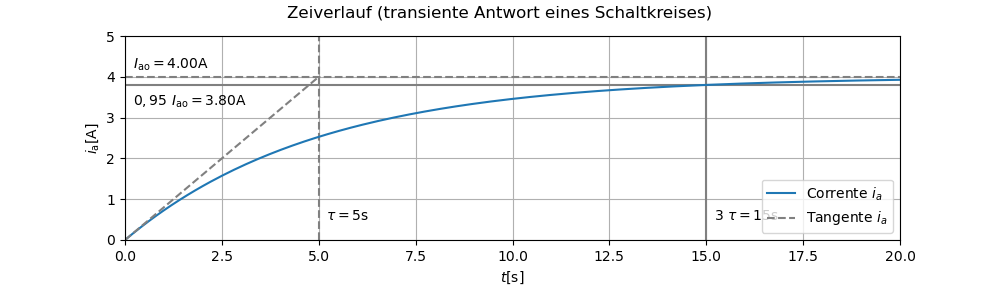

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


# Interaktive Widgets in Jupyter aktivieren
%matplotlib widget

# Zeitarray erstellen
t=np.linspace(0,20,200) # Vektor der Kreisfrequenz

# Figur und Achse erstellen
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=.5, hspace=.5)
ax0 = fig.add_subplot(1, 1, 1)
fig.suptitle('Zeiverlauf (transiente Antwort eines Schaltkreises)')

# Anfangsplot erstellen
p1, = ax0.plot(0, 0)  # Initialisieren des Plots mit (0, 0)
p1.set_xdata(t)  # Setzen der x-Daten

# Achsenbeschriftungen und Grenzen festlegen
ax0.set_xlabel(r'$t[\mathrm{s}]$')  # x-Achsenbeschriftung
ax0.set_ylabel(r'$i_\mathrm{a}[\mathrm{A}]$')  # y-Achsenbeschriftung
ax0.set_xlim(0, 20)  # x-Achsenbereich
ax0.set_ylim(0, 5)  # y-Achsenbereich
ax0.grid()  # Gitterlinien aktivieren

# Interaktive Funktion mit Schiebereglern definieren
@widgets.interact(tau=widgets.IntSlider(value=5, min=1, max=5, description=r'$\tau$'),
                  Iao=widgets.IntSlider(value=4, min=1, max=5, description=r'$I_\mathrm{ao}$'))
def current(tau=5, Iao=4):
    # Berechne die Stromstärke Ia basierend auf tau und Iao
    Ia = Iao * (1 - np.exp(-t / tau))

    # Vorherige vertikale Linie löschen und Plot aktualisieren
    ax0.cla()  # Löschen der aktuellen Achse
    ax0.grid()  # Gitterlinien erneut hinzufügen
    ax0.axvline(3*tau, color='gray')  # vertikale Linie
    ax0.axvline(tau, color='gray', linestyle='--')  # vertikale Linie
    ax0.axhline(Iao*.95, color='gray')  # vertikale Linie
    ax0.axhline(Iao, color='gray', linestyle='--')  # vertikale Linie
    ax0.text(3*tau + 0.2, .5, r'$3 ~\tau = %.0f \mathrm{s} $' %(3*tau), color='black')
    ax0.text(tau + 0.2, .5, r'$\tau = %.0f \mathrm{s} $' %(tau), color='black')
    ax0.text(0.2, Iao * 0.95 - 0.5, r'$0,95 ~ I_\mathrm{ao} = %.2f \mathrm{A} $' % (0.95 * Iao), color='black')
    ax0.text(0.2, Iao + 0.2, r'$I_\mathrm{ao} = %.2f \mathrm{A} $' % (Iao), color='black')
    p1, = ax0.plot(t, Ia, label='Corrente $i_a$')  # Neue Daten plotten
    p1, = ax0.plot([0,tau],[0,Iao], label='Tangente $i_a$', color='gray', linestyle='--')  # Neue Daten plotten
    ax0.set_xlabel(r'$t[\mathrm{s}]$')  # x-Achsenbeschriftung
    ax0.set_ylabel(r'$i_\mathrm{a}[\mathrm{A}]$')  # y-Achsenbeschriftung
    ax0.set_xlim(0, 20)  # x-Achsenbereich
    ax0.set_ylim(0, 5)  # y-Achsenbereich
    ax0.legend()  # Legende hinzufügen, falls nötig